In [16]:

import numpy as np
import matplotlib.pyplot as plt

In [17]:
def convex_func(x, y):
    return - (x ** 2 + y ** 2)


def saddle_func(x, y):
    return x ** 2 - y ** 2


def generate_control_points(n, m, x_width=2.0, y_width=2.0, func=lambda x, y: 0) -> np.ndarray:
    control_points = np.zeros((n + 1, m + 1, 3))
    x_step = x_width / n
    y_step = y_width / m
    x_values = np.arange(- x_width / 2.0, x_width / 2.0 + x_step, x_step)
    y_values = np.arange(- y_width / 2.0, y_width / 2.0 + y_step, y_step)

    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            z = func(x, y)
            control_points[i, j] = [x, y, z]

    return control_points


def generate_convex_control_points(n, m, x_width=2.0, y_width=2.0) -> np.ndarray:
    if n <= 1 or m <= 1:
        raise ValueError('bad dimensions')
    return generate_control_points(n, m, x_width, y_width, func=convex_func)


def generate_saddle_control_points(n, m, x_width=2.0, y_width=2.0) -> np.ndarray:
    if n <= 1 or m <= 1:
        raise ValueError('bad dimensions')
    return generate_control_points(n, m, x_width, y_width, func=saddle_func)


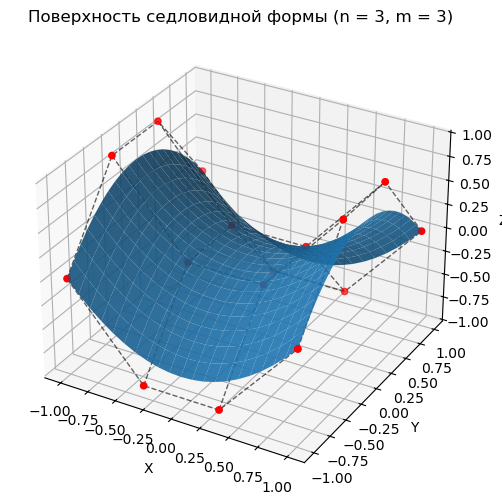

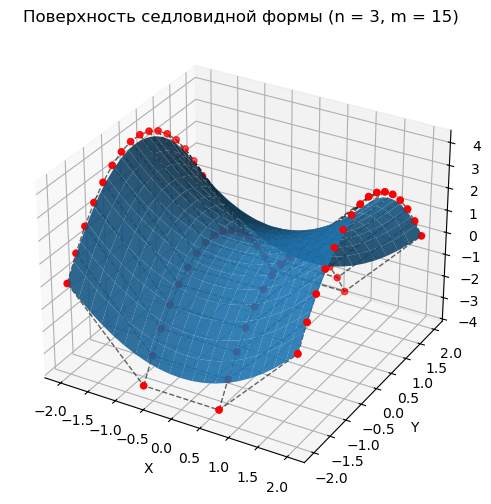

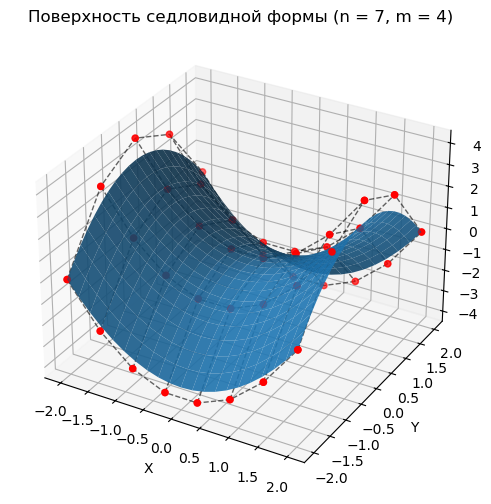

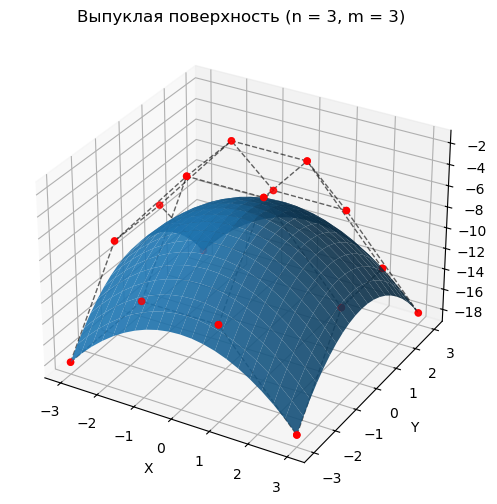

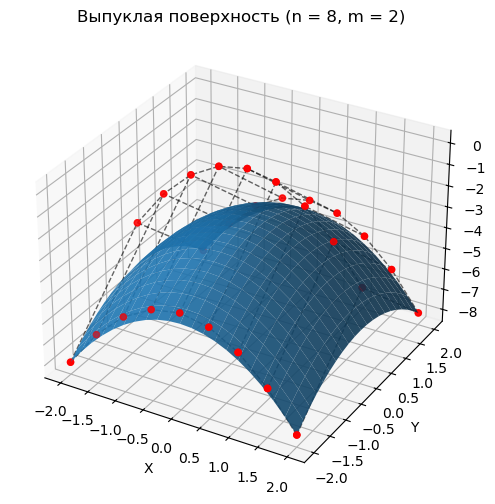

In [18]:

def get_de_casteljau_point(points, t, ):
    b = np.copy(points)
    n = len(points) - 1
    for j in range(1, n + 1):
        for i in range(0, n - j + 1):
            b[i] = (1.0 - t) * b[i] + t * b[i + 1]
    return b[0]


def get_surface_point(control_points, u, v, alpha):
    temp = [get_de_casteljau_point(row, u) for row in control_points]
    return get_de_casteljau_point(temp, v)


def bezier_surface_points(control_points, alpha=0.05):
    x, y, z = [], [], []
    for u in np.arange(0, 1 + alpha, alpha):
        x.append([])
        y.append([])
        z.append([])
        for v in np.arange(0, 1 + alpha, alpha):
            p = get_surface_point(control_points, u, v, alpha)
            x[-1].append(p[0])
            y[-1].append(p[1])
            z[-1].append(p[2])
    return np.array(x), np.array(y), np.array(z)


def plot_control_points(ax, control_points):
    for row in control_points:
        xs, ys, zs = zip(*row)
        ax.plot(xs, ys, zs, 'k--', linewidth=1, alpha=0.6)
        ax.scatter(xs, ys, zs, color='red', s=20)
    for col in range(control_points.shape[1]):
        col_points = control_points[:, col]
        xs, ys, zs = zip(*col_points)
        ax.plot(xs, ys, zs, 'k--', linewidth=1, alpha=0.6)
        ax.scatter(xs, ys, zs, color='red', s=20)

def draw_convex(n, m, xw, yw):
    points = generate_convex_control_points(n, m, xw, yw)
    X, Y, Z = bezier_surface_points(points, alpha=0.05)
    fig2 = plt.figure(figsize=(7, 6))
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.plot_surface(X, Y, Z, alpha=0.9)
    plot_control_points(ax2, points)
    ax2.set_title(f"Выпуклая поверхность (n = {n}, m = {m})")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")

    plt.show()

def draw_saddle(n, m, xw, yw):
    points = generate_saddle_control_points(n, m, xw, yw)
    X, Y, Z = bezier_surface_points(points, alpha=0.05)
    fig2 = plt.figure(figsize=(7, 6))
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.plot_surface(X, Y, Z, alpha=0.9)
    plot_control_points(ax2, points)
    ax2.set_title(f"Поверхность седловидной формы (n = {n}, m = {m})")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")

    plt.show()
draw_saddle(3, 3, 2.0, 2.0)
draw_saddle(3, 15, 4.0, 4.0)
draw_saddle(7, 4, 4.0, 4.0)
draw_convex(3, 3, 6.0, 6.0)
draw_convex(8, 2, 4.0, 4.0)